# Iris Dataset Classification

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/hrishinandanmacbook/Developer/ML/001/02/iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

- No missing values

In [7]:
df.duplicated().sum()

np.int64(0)

- No duplicate rows

In [8]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

- Seperated Numerical and Categorical columns

In [9]:
df_cat.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


- We need to encode species column

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded = pd.DataFrame(le.fit_transform(df_cat['Species']), columns=df_cat.columns, dtype='int')


- Encoded Categorical values

In [11]:
df = pd.concat([df_num, df_encoded], axis=1)

In [12]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


### Logistic Regression

In [13]:
X = df.drop('Species', axis=1)
y = df['Species']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
y_pred = model.predict(X_test)

In [19]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


### Evaluating Logistic Regression Model

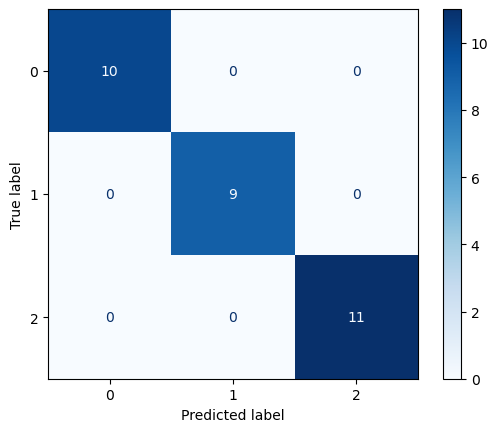

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [32]:
print("Accuracy: ", acc)
print("Precision: ", pre)
print("Recall: ", rec)
print("F1_score: ", f1)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0


### KNN Classifier

In [33]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski')

knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
y_pred_knn = knn.predict(X_test)

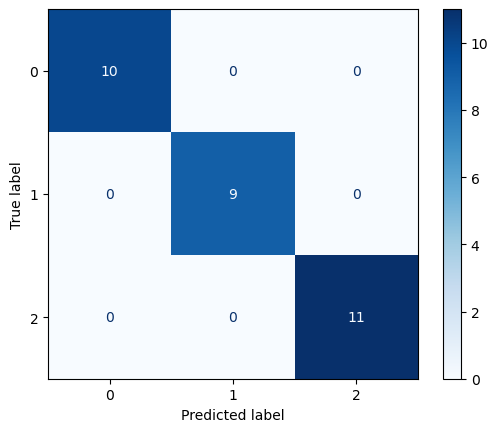

In [35]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [36]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [39]:
y_pred = tree.predict(X_test)

In [40]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

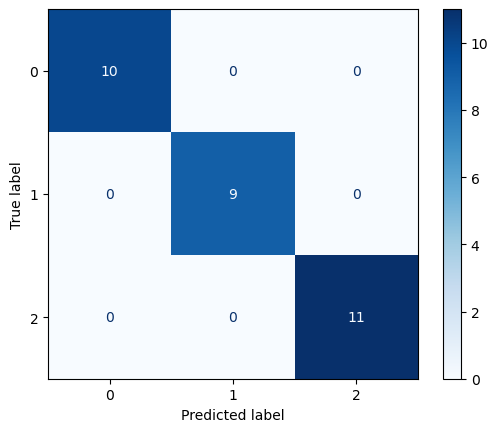

In [43]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [44]:
acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [45]:
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Recall: ', rec)
print('F1 score: ', f1)

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 score:  1.0


### SVM Classification 

In [2]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C='1', gamma='scale')
model.fit(X_train, y_train)

TypeError: SVC.__init__() got an unexpected keyword argument 'kernal'. Did you mean 'kernel'?